http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2018-7Semester-AppliedMath9/07_volterra_model/

In [1]:
using Pkg
Pkg.add("NLsolve")
Pkg.add("Plots")

   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


In [12]:
ENV["GRDIR"]=""
Pkg.build("GR")

   Building GR → `/opt/julia/packages/GR/8mv9N/deps/build.log`


In [2]:
using NLsolve

In [3]:
C1 = C2 = D1 = D2 = 1.0
u0 = v0 = 0.7
Δt = 0.05

0.05

In [4]:
function euler(u,v)
    u_new = (1 + Δt*D1 - Δt*C1*v) * u
    v_new = (1 - Δt*D2 + Δt*C2*u) * v
    u,v = u_new, v_new
    return u, v
end

euler (generic function with 1 method)

In [5]:
euler(u0,v0)

(0.7105, 0.6895)

In [6]:
u,v = u0, v0        # 初期値を入れて…
uv_sq = [ u0, v0 ]  # グラフを描きたいので、データをとっておこう

for i in 1:500
    u,v = euler(u,v)
    uv_sq = hcat(uv_sq, [u,v])  # データを追加
end

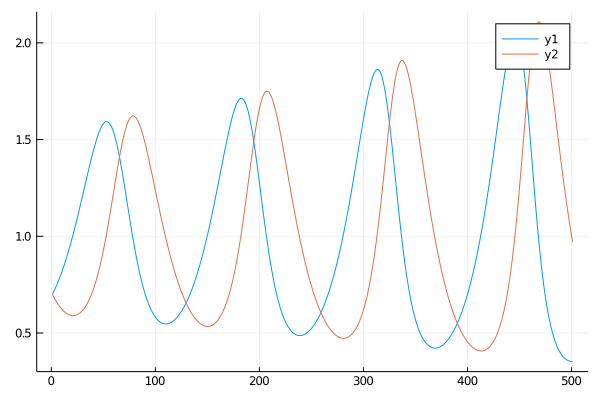

In [16]:
using Plots

plot(uv_sq') 

#### http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2018-7Semester-AppliedMath9/04-nlsolve/

In [14]:
# nlsolve用関数
function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [15]:
# スカラー値を得る
nls(cos, ini = 1.2)

(1.5707963267948968, true)

In [40]:
# 二次方程式
function z(u)
    x,y = u
    return [ x+2*y+1, x^2+2*y^2-1 ]
end

z (generic function with 2 methods)

In [42]:
z([5, 2])

2-element Array{Int64,1}:
 10
 32

In [44]:
zz = nls(z, ini=[5.0, 2.0])

([0.33333333443223917, -0.6666666672161197], true)

In [45]:
z(zz[1])


2-element Array{Float64,1}:
 -2.220446049250313e-16
  2.19781193244728e-9

In [29]:
function h(u, p, q)
    a,b = u # u[1] とか u[2] とか毎回書くのは面倒なので，a,b で代用できるようにして…
    return [ cos(a)^2 + sin(b)^2 - p, sin(a)^2 - cos(b)^2 - q ]
end

h (generic function with 1 method)

In [30]:
p,q = 0.5, 0.4
ini_v = [4.0,4.0]

zz = nls(h, p, q, ini = ini_v)

([4.486875574486246, 3.8769071064064615], true)